### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import requests
from bs4 import BeautifulSoup
from sklearn.metrics import precision_recall_fscore_support

### Importing dataset

In [4]:
file_path='website_classification.csv'
dataset=pd.read_csv(file_path)

In [ ]:
dataset.head()

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [5]:
dataset.columns

Index(['Unnamed: 0', 'website_url', 'cleaned_website_text', 'Category'], dtype='object')

In [6]:
dataset.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
dataset.tail()

,website_url,cleaned_website_text,Category
1404,http://www.webcamslave.com,bdsm cams bdsm chat bondage cams free bdsm vid...,Adult
1405,http://www.buyeuroporn.com/,porno dvd online european porn dvd cheap adult...,Adult
1406,http://www.analdreamhouse.com/30/03/agecheck/i...,anal dream house anal dream house anal dream h...,Adult
1407,http://www.world-sex-news.com/,world sex news daily sex news adult news eroti...,Adult
1408,https://www.github.com,GitHub is where people build software. More th...,Computers and Technology


### EDA

In [8]:
dataset.isnull().sum()

website_url             0
cleaned_website_text    0
Category                0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   website_url           1409 non-null   object
 1   cleaned_website_text  1409 non-null   object
 2   Category              1409 non-null   object
dtypes: object(3)
memory usage: 33.2+ KB


In [10]:
dataset.describe()

,website_url,cleaned_website_text,Category
count,1409,1409,1409
unique,1385,1376,16
top,https://carehospitals.com/,good multispecialty hospital hyderabad india c...,Education
freq,4,4,114


In [11]:
dataset['Category'].value_counts()

Category
Education                          114
Business/Corporate                 109
Travel                             107
Streaming Services                 105
Sports                             104
E-Commerce                         102
Games                               98
News                                96
Health and Fitness                  96
Computers and Technology            94
Photography                         93
Food                                92
Law and Government                  84
Social Networking and Messaging     83
Forums                              16
Adult                               16
Name: count, dtype: int64

### Visulaization of Dataset

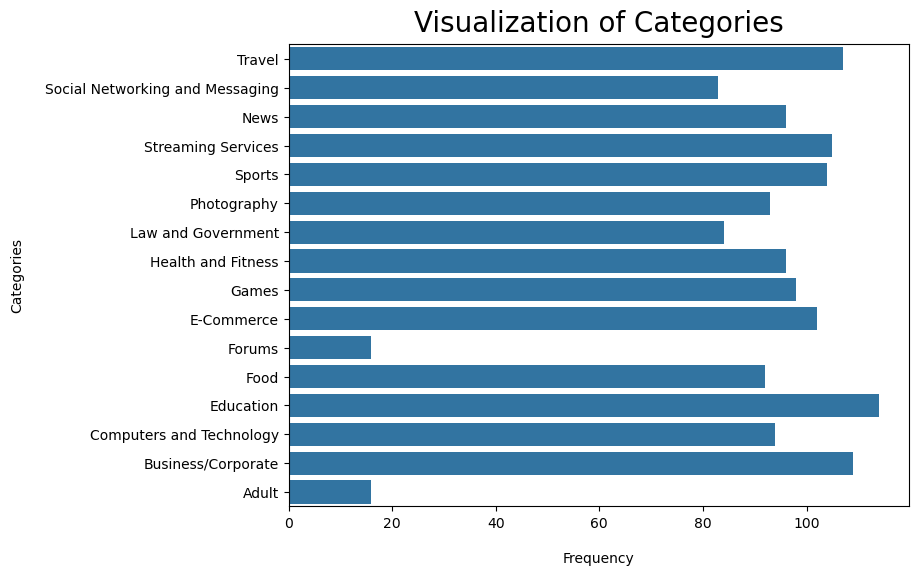

In [12]:
plt.figure(figsize=(8,6))
ax=sns.countplot(y="Category",data=dataset)
plt.title("Visualization of Categories",y=1.01,fontsize=20)
plt.xlabel("Frequency",labelpad=15)
plt.ylabel("Categories",labelpad=15)
plt.show()

### Training the Model

In [13]:
X=dataset['cleaned_website_text']
Y=dataset['Category']

In [14]:
Le=LabelEncoder()

In [15]:
Le.fit(Y)

LabelEncoder()

In [16]:
Le.classes_

array(['Adult', 'Business/Corporate', 'Computers and Technology',
       'E-Commerce', 'Education', 'Food', 'Forums', 'Games',
       'Health and Fitness', 'Law and Government', 'News', 'Photography',
       'Social Networking and Messaging', 'Sports', 'Streaming Services',
       'Travel'], dtype=object)

In [17]:
Y=Le.transform(Y)

In [18]:
Y

array([15, 15, 15, ...,  0,  0,  2])

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [20]:
text_clf=Pipeline(
    [
        ('tfidf',TfidfVectorizer()),
        ('clf',LinearSVC())
    ]
)

In [21]:
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [22]:
predictions=text_clf.predict(X_test)

In [23]:
prediction_names=Le.inverse_transform(predictions)

In [24]:
accuracy=accuracy_score(y_test,predictions)
print(accuracy)

0.9397163120567376


In [25]:
print(classification_report(y_test,predictions,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.84      0.91      0.88        23
           2       0.70      0.94      0.80        17
           3       1.00      1.00      1.00        19
           4       1.00      0.96      0.98        24
           5       0.95      0.95      0.95        19
           6       0.00      0.00      0.00         2
           7       1.00      0.86      0.93        22
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        23
          10       0.94      0.94      0.94        18
          11       0.95      0.95      0.95        20
          12       1.00      0.78      0.88        18
          13       1.00      0.96      0.98        23
          14       1.00      1.00      1.00        18
          15       0.86      1.00      0.93        19

    accuracy                           0.94       282
   macro avg       0.89   

In [26]:
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  1  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  1 16  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0 19  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 17  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1 19  0  0  0  0]
 [ 0  1  1  0  0  1  0  0  0  0  0  1 14  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 19]]


In [27]:
category_name=Le.inverse_transform(Y)

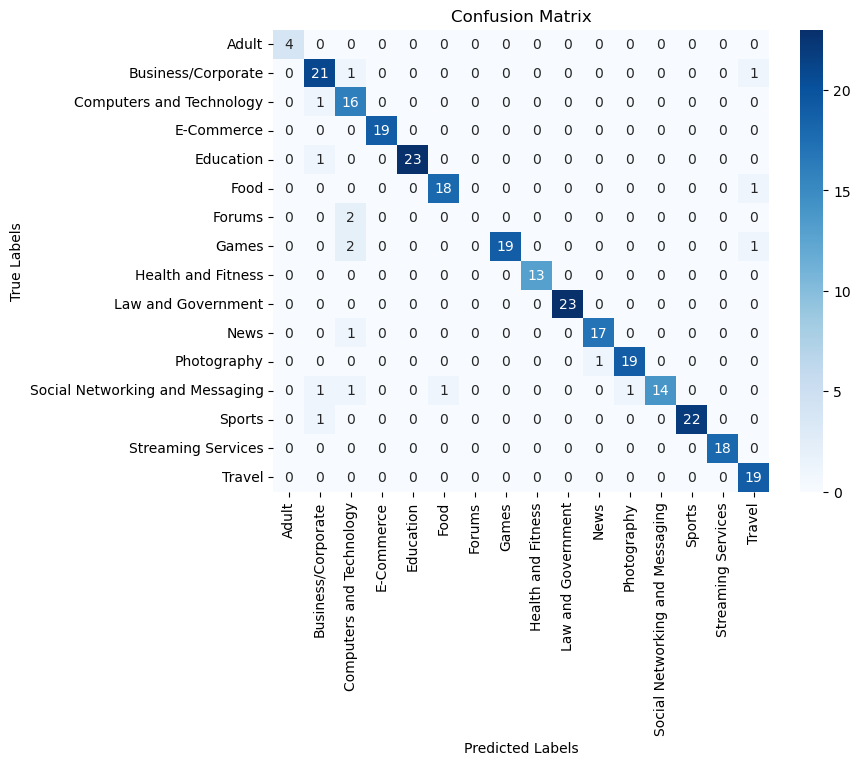

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=Le.classes_,yticklabels=Le.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

### Assigning Productivity & Non-Productivity to URL's

In [29]:
def assign_productivity(category):
    productive=["Education", "Business/Corporate", "News", "Health and Fitness", "Law and Government", "Computers and Technology"]
    non_productive=["Games", "Streaming Services", "Social Networking and Messaging", "Adult", "Forums","E-Commerce","Food","Photography","Travel","Sports"]

    if category in productive:
        return "Productive"
    elif category in non_productive:
        return "Non-Productive"

dataset["Level"]=dataset["Category"].apply(assign_productivity)

In [30]:
dataset.columns

Index(['website_url', 'cleaned_website_text', 'Category', 'Level'], dtype='object')

#### predicting for level (i.e productivity / non-productivity)

In [31]:
X = dataset['cleaned_website_text']
Y = dataset['Level']

Le_productivity = LabelEncoder()
Le_productivity.fit(Y)
Y = Le_productivity.transform(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

productivity_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])

productivity_clf.fit(X_train, y_train)

predictions = productivity_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Level Classification Accuracy: {accuracy}")


Level Classification Accuracy: 0.9574468085106383


In [32]:
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[156   8]
 [  4 114]]


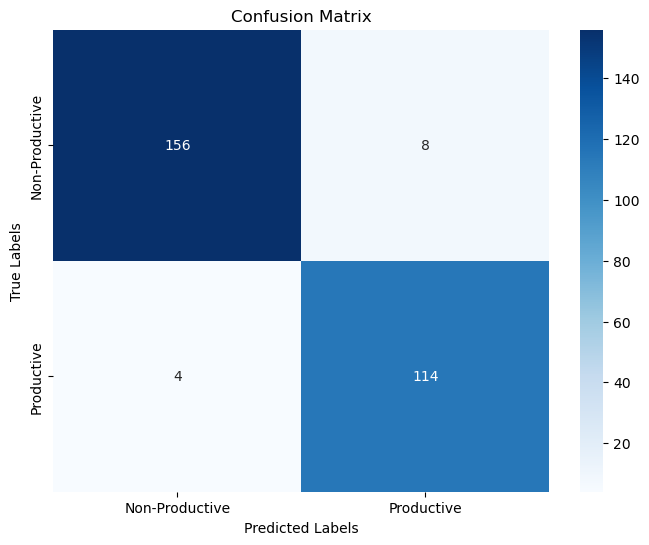

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",xticklabels=Le_productivity.classes_,yticklabels=Le_productivity.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [33]:
len(Le.classes_)

16

### Predicting URL's category

In [34]:
def extract_meta_data(url):
    headers={"User-Agent":"Mozilla/5.0"}
    response=requests.get(url,headers=headers,timeout=5)
    if response.status_code==200:
        soup=BeautifulSoup(response.text,"html.parser")
        meta_tag=soup.find("meta",attrs={"name":"description"})["content"]
        return meta_tag

urls = [
    "https://www.youtube.com/freecodecamp",
    "https://www.coursera.org",
    "https://www.netflix.com",
    "https://www.espn.com",
    "https://www.github.com",
    "https://www.youtube.com/wwe",
    "https://youtube.com/@bbkivines",
    "https://youtube.com/@apnacollegeofficial",
    "https://ome.tv/",
    "https://www.wikipedia.org",
]

meta_texts = [extract_meta_data(url) for url in urls]
predictions = productivity_clf.predict(meta_texts)
prediction_labels = Le_productivity.inverse_transform(predictions)

    # Print results
for url, label in zip(urls, prediction_labels):
    print(f"URL: {url} → {label}")


URL: https://www.youtube.com/freecodecamp → Productive
URL: https://www.coursera.org → Productive
URL: https://www.netflix.com → Non-Productive
URL: https://www.espn.com → Non-Productive
URL: https://www.github.com → Productive
URL: https://www.youtube.com/wwe → Non-Productive
URL: https://youtube.com/@bbkivines → Non-Productive
URL: https://youtube.com/@apnacollegeofficial → Productive
URL: https://ome.tv/ → Non-Productive
URL: https://www.wikipedia.org → Productive


In [35]:
import tensorflow as tf
import pickle
# save the model to disk
filename = 'svm_stem(3,3).sav'
pickle.dump(productivity_clf, open(filename, 'wb'))
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

y_pred=loaded_model.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.9580223229856993, 0.9574468085106383, 0.9575387444181769, None)

In [ ]:
dataset.columns

Index(['website_url', 'cleaned_website_text', 'Category', 'Level'], dtype='object')